## Welcome to Detective Agency

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

from src.DigitalTwin import QuickStart, Metrics

-----

In [2]:
agency= QuickStart(rm=dict(
            murder=dict(price=2000, avg_time=2, success_rate=1.),
            theft=dict(price=500, avg_time=3, success_rate=0.9),
            adultery=dict(price=800, avg_time=1, success_rate=1),
        ),
        sh=dict(
            murder=dict(price=2000, avg_time=2, success_rate=0.5),
            theft=dict(price=500, avg_time=3, success_rate=0.5),
            adultery=dict(price=800, avg_time=1, success_rate=0.5),
        ),).go()

In [3]:
df=agency.get_dataframe()

In [4]:
df.head()

,status,init_date,finish_date,time_spent,detective_id,revenue,case_type
0,1,2009-06-02 13:45:14.215500,2009-06-04 08:34:16.051012,1 days 18:49:01.835512,1,2000,murder
1,1,2001-04-21 00:32:39.838608,2001-04-23 01:20:36.997983,2 days 00:47:57.159375,0,2000,murder
2,1,2004-01-28 23:51:54.126734,2004-01-31 05:37:10.941817,2 days 05:45:16.815083,1,2000,murder
3,1,2022-03-03 16:33:07.058025,2022-03-04 19:08:12.835053,1 days 02:35:05.777028,1,800,adultery
4,1,2019-08-24 08:48:25.172604,2019-08-27 10:02:48.107100,3 days 01:14:22.934496,1,500,theft


<Axes: xlabel='revenue', ylabel='Count'>

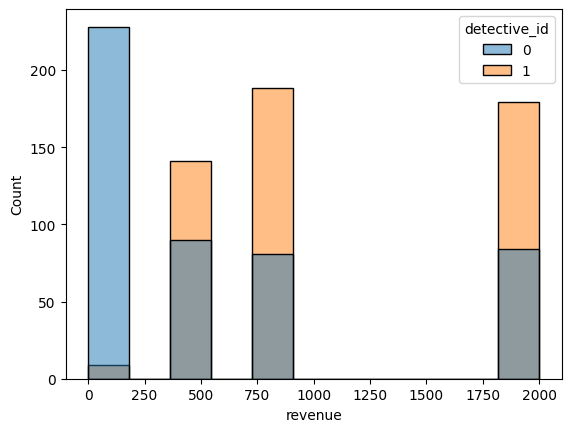

In [5]:
sns.histplot(df,x='revenue', hue='detective_id')

In [6]:
df['timeSpent']=df['time_spent'].dt.days

-----

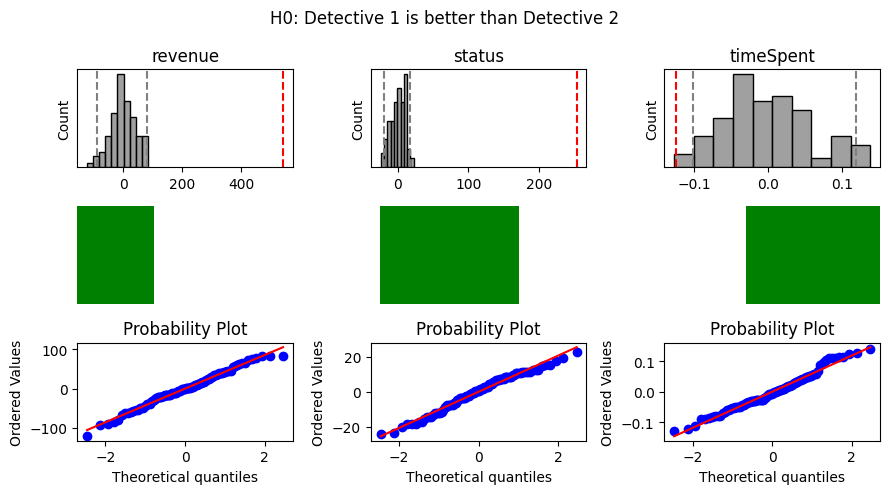

In [7]:
mb=Metrics(df)
boot=mb.get_bootstrap(names=[('revenue', 'mean'), ('status', 'sum'), ('timeSpent', 'mean')])
boot.show(ttest=False)

In [8]:
mb=Metrics(df)
stats=mb.get_ttest(names=[('revenue', 'mean'), ('status', 'sum'), ('timeSpent', 'mean')])

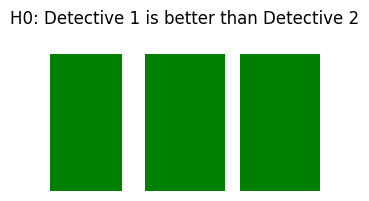

In [9]:
stats.show()

---

Sandbox for bootstrap

In [40]:
rm = df[df.detective_id==0]
sh = df[df.detective_id==1]

In [41]:
rm_means=pd.Series([rm.sample(frac=1, replace=True)['revenue'].mean() for _ in range(10000)])
sh_means=pd.Series([sh.sample(frac=1, replace=True)['revenue'].mean() for _ in range(10000)])

In [42]:
effect=sh_means.mean()-rm_means.mean()
diffs= sh_means-rm_means-effect
p_value = np.mean(np.abs(diffs) >= np.abs(effect))

In [43]:
zalpha=stats.norm.ppf(0.025)
se=np.sqrt(sum([(x)**2 for x in diffs])/len(diffs))

In [44]:
print(f"Observed effect: {effect}")
print(f"Bootstrap p-value: {p_value}")

Observed effect: 24.46537817699698
Bootstrap p-value: 0.5803


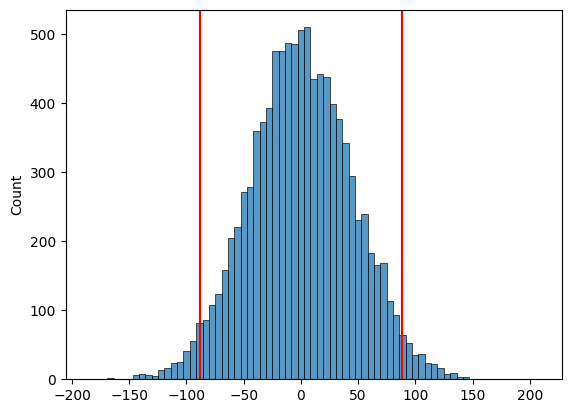

In [45]:
sns.histplot(diffs)

plt.axvline(diffs.quantile(0.025))
plt.axvline(diffs.quantile(0.975))
plt.axvline(se*1.96,color='r')
plt.axvline(-se*1.96,color='r')

Normality

In [17]:
from scipy.stats import shapiro
shapiro(diffs)

/opt/homebrew/Caskroom/mambaforge/base/envs/detective/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.9997310635757752), pvalue=np.float64(0.21722817664797486))

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943], shape=(10000,)),
  array([-161.42416206, -157.67160817, -154.37119834, ...,  161.91082349,
          162.29929664,  163.16610757], shape=(10000,))),
 (np.float64(45.094774471935345),
  np.float64(2.4671231933112865e-14),
  np.float64(0.999882054771909)))

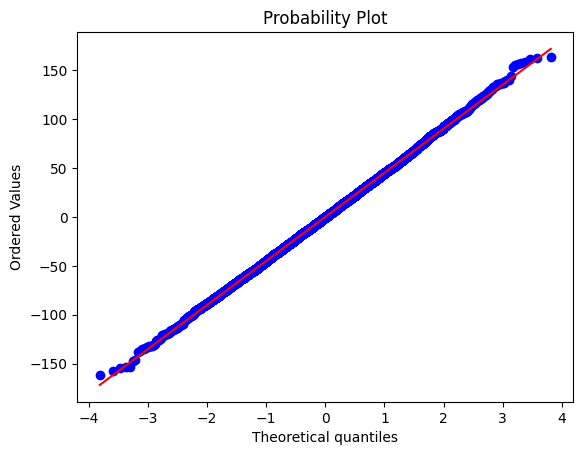

In [ ]:
stats.probplot(diffs, dist='norm', plot=plt)